In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [ ]:
data =  pd.read_csv("/content/drive/MyDrive/Stress-Lysis.csv")

In [ ]:
data.sample(10)

,Humidity,Temperature,Step count,Stress Level
489,29.09,98.09,180,2
242,11.10,80.10,19,0
626,19.87,88.87,129,1
733,25.33,94.33,159,2
195,19.14,88.14,94,1
1635,29.42,98.42,142,2
1629,26.39,95.39,194,2
800,27.62,96.62,175,2
1737,20.85,89.85,113,1
1804,13.50,82.50,77,0


**Inference 01:** As the stress increases then body temperature, sweating (humidity), and step count increases.



---


>>These independant variables have direct relation with each other and with dependant variable also.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step count    2001 non-null   int64  
 3   Stress Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [ ]:
data.describe()

,Humidity,Temperature,Step count,Stress Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


>>**Strandard Deviation** of step count is very large as there are values at the two extremes **(step count = 0 | step count = 200)** .

**INFERENCE 02:** From the correlation between the variables we can see the the humidity and temperature have a more strong relations with dependant variable (Stress level), while Step rate has a little bit less strong relation with dependant variable then the other two.

In [ ]:
correlation_1 = data['Humidity'].corr(data['Stress Level'])

In [ ]:
correlation_2 = data['Temperature'].corr(data['Stress Level'])

In [ ]:
correlation_3 = data['Step count'].corr(data['Stress Level'])

In [ ]:
print(correlation_1, correlation_2, correlation_3)

0.936036289911449 0.936036289911449 0.8326232433614357


In [ ]:
correlation_temp_humid = correlation_2 = data['Temperature'].corr(data['Humidity'])

In [ ]:
correlation_temp_humid

1.0

**INFERENCE 03:** It is really important to note here that the humidity and temperature variables have the equal relation with the dependant variable, and these two independant variables have exact direct relation with each other, which makes one variable ***completely redundant***, but the sake of making this project a little bit complex we will use the both variables despite redundancy.

# **Visualization**
1.   **Scatter Plot**
2.   **Box Plot**
2.   **Pair Plot**
1.   **3D Scatter Plot**
2.   **Distribution Plot**



**Scatter Plot Humidity Vs Stress Level**

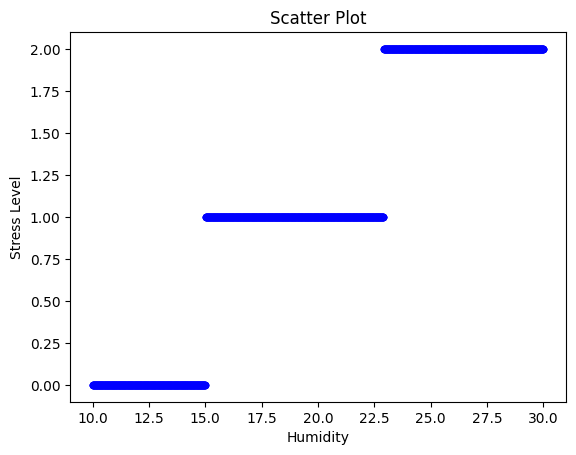

In [ ]:
data.plot.scatter(x='Humidity', y='Stress Level', color = "blue")
plt.xlabel('Humidity')
plt.ylabel('Stress Level')
plt.title('Scatter Plot')
plt.show()


In [ ]:
fig = px.scatter(data, x='Humidity', y='Stress Level', title='Scatter Plot')

fig.update_xaxes(title_text='Humidity', gridcolor='lightgray')
fig.update_yaxes(title_text='Stress Level', gridcolor='lightgray')

fig.update_traces(marker=dict(size=10, opacity=0.7, line=dict(width=2, color='blue')))

fig.show()

**Scatter Plot Step count vs Stress level**

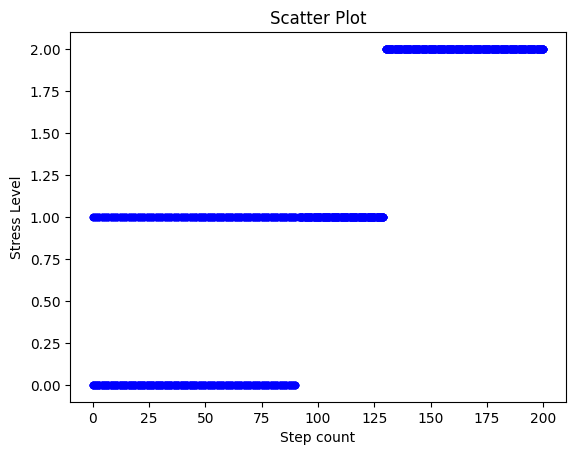

In [ ]:
data.plot.scatter(x='Step count', y='Stress Level', color = "blue")
plt.xlabel('Step count')
plt.ylabel('Stress Level')
plt.title('Scatter Plot')
plt.show()


In [ ]:
fig = px.scatter(data, x='Step count', y='Stress Level', title='Scatter Plot')

fig.update_xaxes(title_text='Step count', gridcolor='lightgray')
fig.update_yaxes(title_text='Stress Level', gridcolor='lightgray')

fig.update_traces(marker=dict(size=10, opacity=0.7, line=dict(width=2, color='blue')))

fig.show()

**Scatter Plot Step count vs Stress level**

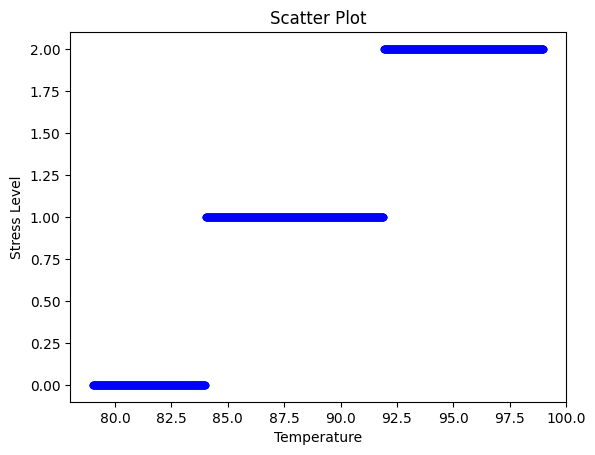

In [ ]:
data.plot.scatter(x='Temperature', y='Stress Level', color = "blue")
plt.xlabel('Temperature')
plt.ylabel('Stress Level')
plt.title('Scatter Plot')
plt.show()


In [ ]:
fig = px.scatter(data, x='Step count', y='Stress Level', title='Scatter Plot')

fig.update_xaxes(title_text='Step count', gridcolor='lightgray')
fig.update_yaxes(title_text='Stress Level', gridcolor='lightgray')

fig.update_traces(marker=dict(size=10, opacity=0.7, line=dict(width=2, color='blue')))

fig.show()

**Box plot Humidity vs Stress level**

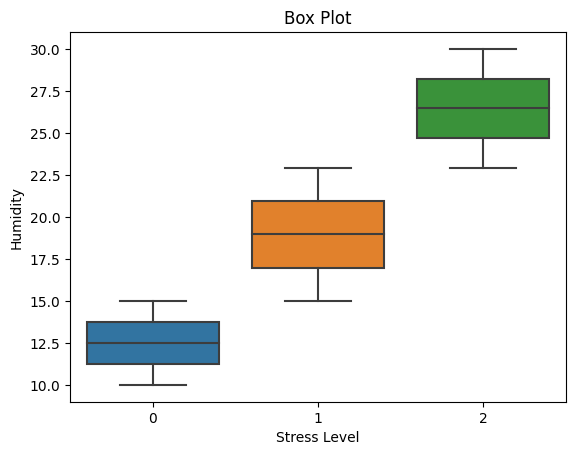

In [ ]:
sns.boxplot(x='Stress Level', y='Humidity', data=data)
plt.xlabel('Stress Level')
plt.ylabel('Humidity')
plt.title('Box Plot')
plt.show()


**Box plot Step count vs Stress level**

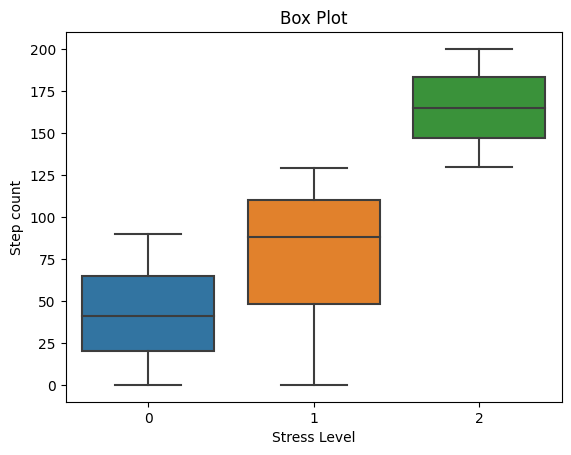

In [ ]:
sns.boxplot(x='Stress Level', y='Step count', data=data)
plt.xlabel('Stress Level')
plt.ylabel('Step count')
plt.title('Box Plot')
plt.show()

**Box Plot Temperature vs Stress level**

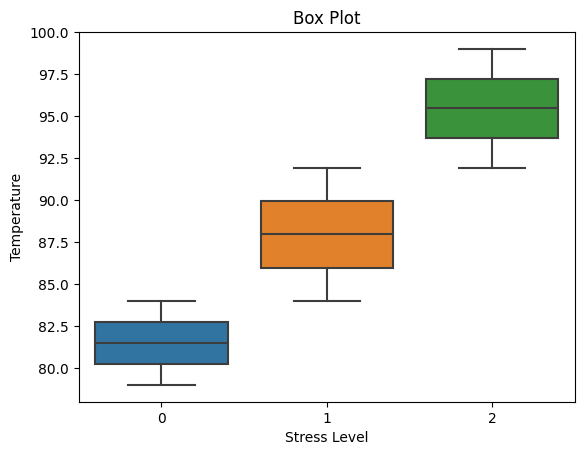

In [ ]:
sns.boxplot(x='Stress Level', y='Temperature', data=data)
plt.xlabel('Stress Level')
plt.ylabel('Temperature')
plt.title('Box Plot')
plt.show()

**Pair Plot**

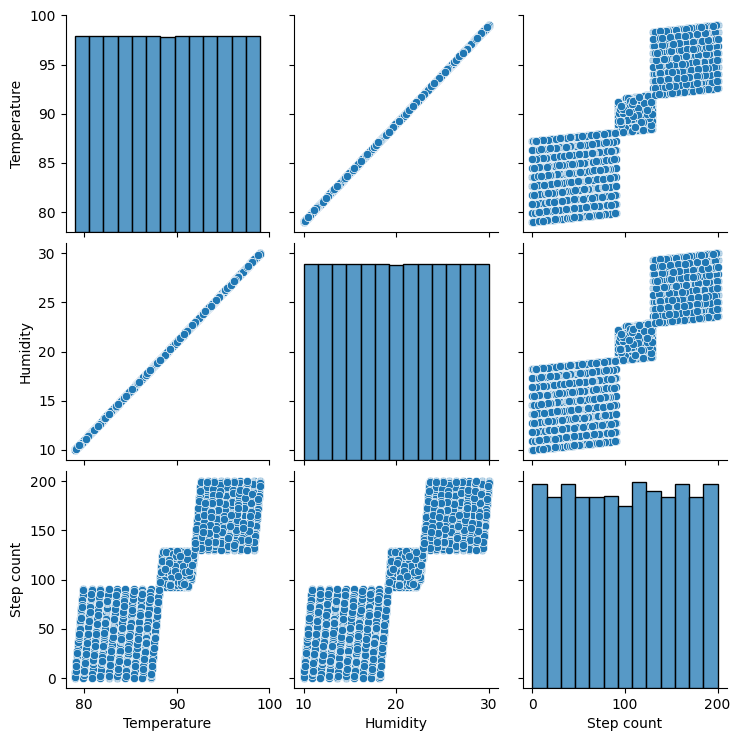

In [ ]:
sns.pairplot(data[['Temperature', 'Humidity', 'Step count']])
plt.show()

**3D Scatter Plot**

In [ ]:
fig = px.scatter_3d(data, x='Humidity', y='Step count', z='Stress Level',
                    labels={'Humidity': 'Humidity', 'Step count': 'Step count', 'Stress Level': 'Stress Level'},
                    color=data['Humidity'], color_continuous_scale='Inferno',
                    title="3D Scatter Plot")

fig.update_layout(scene=dict(xaxis_title='Humidity', yaxis_title='Step count', zaxis_title='Stress Level'))
fig.show()


 **Data Distributions:** We always strive to have the normal distribution for the variables as this distribution makes algorithms work properly. There must be no or very less skewness. In this case all variables have almost normal distribution so no need to apply any transformation.

In [ ]:
data["Step count"].skew()

-0.006998237335226013

In [ ]:
data["Humidity"].skew()

1.1799934674869502e-18

**Distribution Plot**

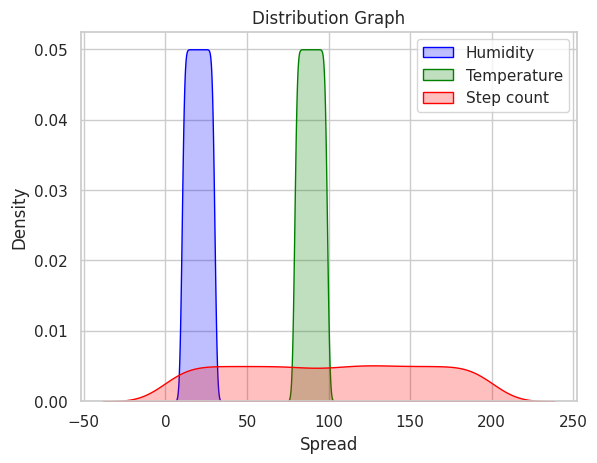

In [ ]:
sns.set(style="whitegrid")

sns.kdeplot(data["Humidity"], fill=True, label='Humidity', color = 'blue')
sns.kdeplot(data["Temperature"], fill=True, label='Temperature', color = 'green')
sns.kdeplot(data["Step count"], fill=True, label='Step count', color = 'red')

plt.xlabel('Spread')
plt.ylabel('Density')
plt.title('Distribution Graph')
plt.legend()

plt.show()


**INFERENCE 04:**


1.   **No Outliers**
2.   **No missing values**
1.  **Normal Distribution**
2.   **Normalized values**




 logistic regression , ensemable learning , Multiclass svm, Knn

**Algorithm #1 : Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, Y_train,Y_test = train_test_split(data.drop("Stress Level", axis = 1), data["Stress Level"], random_state = 42,train_size =0.7)

In [ ]:
print(X_train.shape, Y_train.shape)

(1400, 3) (1400,)


In [ ]:
print(X_test.shape,Y_test.shape)

(601, 3) (601,)


In [ ]:
logist_object = LogisticRegression(penalty = "l2",max_iter = 1000,  multi_class = "multinomial", solver = "lbfgs")

In [ ]:
logist_object.fit(X_train,Y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
Y_prediction = logist_object.predict(X_test)

**Performance Metrices**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [ ]:
accuracy = accuracy_score(Y_test, Y_prediction)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
precision = precision_score(Y_test, Y_prediction, average='weighted')
print("Precision:", precision)

Precision: 1.0


In [ ]:
f1 = f1_score(Y_test, Y_prediction, average='weighted')
print("F1 Score:", f1)

F1 Score: 1.0


**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter =1000)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
scores = cross_val_score(model, data.drop("Stress Level", axis = 1),data["Stress Level"], cv=kf, scoring='accuracy')
average_score = scores.mean()
std_deviation = scores.std()
print("Average Accuracy:", average_score)
print("Standard Deviation of Accuracy:", std_deviation)

Average Accuracy: 0.9995
Standard Deviation of Accuracy: 0.0009999999999999788


**Algorithm #2: Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF_object = RandomForestClassifier(n_estimators=100,max_depth = 5, min_samples_leaf = 3,min_samples_split = 5, random_state=42)

RF_object.fit(X_train, Y_train)


RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=5,
                       random_state=42)

In [ ]:

Y_prediction_rf = RF_object.predict(X_test)


**Performance Metrices**

In [ ]:
accuracy_rf = accuracy_score(Y_test, Y_prediction_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 1.0


In [ ]:
precision = precision_score(Y_test, Y_prediction_rf, average='weighted')
print("Random Forest Precision",precision)

Random Forest Precision 1.0


In [ ]:
f1 = f1_score(Y_test, Y_prediction_rf, average='weighted')
print("Random Forest F1 Score",f1)

Random Forest F1 Score 1.0


**Grid Search For best Hyper-Parameters**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RF_object, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)